In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def describe_momentums(df):
    stats = df.describe(percentiles=[.5])
    stats.rename(index={'50%': 'median'}, inplace=True)
    stats = stats.reindex(['count', 'min', 'max', 'median', 'mean', 'std'])
    stats = stats.append(pd.Series(data=df.skew(), name='skew'))
    stats = stats.append(pd.Series(data=df.kurt(), name='kurt'))
    return stats

In [3]:


fname = 'data.csv'
df = pd.read_csv(fname, skiprows=range(1, 2))

print(df.columns.values)



['ID' 'StartDate' 'EndDate' 'Status' 'IPAddress' 'Progress'
 'Duration (in seconds)' 'Finished' 'RecordedDate' 'ResponseId'
 'RecipientLastName' 'RecipientFirstName' 'RecipientEmail'
 'ExternalReference' 'LocationLatitude' 'LocationLongitude'
 'DistributionChannel' 'UserLanguage' 'Q1_4' 'Q1_5' 'Q2' 'Q3' 'Q4' 'Q5'
 'Q6' 'Q7_1' 'Q7_2' 'Q7_3' 'Q8' 'Q9' 'Q10' 'Q11' 'Q13'
 'Q14_1 (Converted to Age)' 'Q15' 'Q16' 'Q17' 'Q18' 'Q19' 'Q20' 'Q21'
 'Q22' 'Q23_1' 'Q23_2' 'Q23_3' 'Q24' 'Q25' 'Q26' 'Q27' 'Q28' 'Q29' 'Q89'
 'Q30_8' 'Q30_9' 'Q30_3' 'Q30_4' 'Q30_5' 'Q30_6' 'Q30_2' 'Q31_3' 'Q31_4'
 'Q31_5' 'Q31_6' 'Q31_2' 'Q32' 'Q33' 'Q34_3' 'Q34_4' 'Q34_5' 'Q34_6'
 'Q34_2' 'Q35' 'Q36' 'Q37' 'Q38_1' 'Q38_3' 'Q38_4' 'Q38_5' 'Q38_6' 'Q39'
 'Q40' 'Q41' 'Q42' 'Q43_2' 'Q43_5' 'Q43_3' 'Q43_10' 'Q43_11' 'Q44' 'Q45_2'
 'Q45_5' 'Q45_4' 'Q45_11' 'Q45_12' 'Q46_2' 'Q46_5' 'Q46_4' 'Q46_11'
 'Q46_12' 'Q47_2' 'Q47_5' 'Q47_4' 'Q47_11' 'Q47_12' 'Q48' 'Q49_2' 'Q49_5'
 'Q49_4' 'Q49_10' 'Q49_11' 'Q50_2' 'Q50_5' 'Q50_4' 'Q50

/Users/bramshqamarchandio/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (69,120,121,122,123,124,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,168,180) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:


df.rename(columns={'Duration (in seconds)': 'Duration'}, inplace=True)
df.rename(columns={'Q14_1 (Converted to Age)': 'Q14_1'}, inplace=True)
df.rename(columns={'Access Zip': 'AccessZip'}, inplace=True)
df.rename(columns={'Access Country': 'AccessCountry'}, inplace=True)
df.rename(columns={'Access Date': 'AccessDate'}, inplace=True)
df.rename(columns={'Access Time': 'AccessTime'}, inplace=True)
df.rename(columns={'Inquiry type': 'InquiryType'}, inplace=True)
df.rename(columns={'Mobile Device': 'MobileDevice'}, inplace=True)
df.rename(columns={'Mobile type': 'MobileType'}, inplace=True)
df.rename(columns={'UG Campus': 'UGCampus'}, inplace=True)
df.rename(columns={'Campus assignment': 'CampusAssignment'}, inplace=True)
df.rename(columns={'Q52_2 - Topics': 'Q52_2-Topics'}, inplace=True)
df.rename(columns={'56_5 - Topics': '56_5-Topics'}, inplace=True)

print(df.columns.values)



['ID' 'StartDate' 'EndDate' 'Status' 'IPAddress' 'Progress' 'Duration'
 'Finished' 'RecordedDate' 'ResponseId' 'RecipientLastName'
 'RecipientFirstName' 'RecipientEmail' 'ExternalReference'
 'LocationLatitude' 'LocationLongitude' 'DistributionChannel'
 'UserLanguage' 'Q1_4' 'Q1_5' 'Q2' 'Q3' 'Q4' 'Q5' 'Q6' 'Q7_1' 'Q7_2'
 'Q7_3' 'Q8' 'Q9' 'Q10' 'Q11' 'Q13' 'Q14_1' 'Q15' 'Q16' 'Q17' 'Q18' 'Q19'
 'Q20' 'Q21' 'Q22' 'Q23_1' 'Q23_2' 'Q23_3' 'Q24' 'Q25' 'Q26' 'Q27' 'Q28'
 'Q29' 'Q89' 'Q30_8' 'Q30_9' 'Q30_3' 'Q30_4' 'Q30_5' 'Q30_6' 'Q30_2'
 'Q31_3' 'Q31_4' 'Q31_5' 'Q31_6' 'Q31_2' 'Q32' 'Q33' 'Q34_3' 'Q34_4'
 'Q34_5' 'Q34_6' 'Q34_2' 'Q35' 'Q36' 'Q37' 'Q38_1' 'Q38_3' 'Q38_4' 'Q38_5'
 'Q38_6' 'Q39' 'Q40' 'Q41' 'Q42' 'Q43_2' 'Q43_5' 'Q43_3' 'Q43_10' 'Q43_11'
 'Q44' 'Q45_2' 'Q45_5' 'Q45_4' 'Q45_11' 'Q45_12' 'Q46_2' 'Q46_5' 'Q46_4'
 'Q46_11' 'Q46_12' 'Q47_2' 'Q47_5' 'Q47_4' 'Q47_11' 'Q47_12' 'Q48' 'Q49_2'
 'Q49_5' 'Q49_4' 'Q49_10' 'Q49_11' 'Q50_2' 'Q50_5' 'Q50_4' 'Q50_10'
 'Q50_11' 'Q51_2' 'Q51_5' 'Q

# what Questions were least answered

In [5]:
sum(np.isnan(df["Q1_4"])) / len(df["Q1_4"])

1.0

In [6]:
columns = df.columns.values[18:159]

In [7]:
len(columns)

141

In [8]:
columns = np.append(columns, np.array(['Q52_2-Topics', '56_5-Topics']))

In [9]:
pd.isnull(np.array([np.nan, 0], dtype=object))

array([ True, False])

In [10]:
columns

array(['Q1_4', 'Q1_5', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7_1', 'Q7_2',
       'Q7_3', 'Q8', 'Q9', 'Q10', 'Q11', 'Q13', 'Q14_1', 'Q15', 'Q16',
       'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23_1', 'Q23_2',
       'Q23_3', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q89', 'Q30_8',
       'Q30_9', 'Q30_3', 'Q30_4', 'Q30_5', 'Q30_6', 'Q30_2', 'Q31_3',
       'Q31_4', 'Q31_5', 'Q31_6', 'Q31_2', 'Q32', 'Q33', 'Q34_3', 'Q34_4',
       'Q34_5', 'Q34_6', 'Q34_2', 'Q35', 'Q36', 'Q37', 'Q38_1', 'Q38_3',
       'Q38_4', 'Q38_5', 'Q38_6', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43_2',
       'Q43_5', 'Q43_3', 'Q43_10', 'Q43_11', 'Q44', 'Q45_2', 'Q45_5',
       'Q45_4', 'Q45_11', 'Q45_12', 'Q46_2', 'Q46_5', 'Q46_4', 'Q46_11',
       'Q46_12', 'Q47_2', 'Q47_5', 'Q47_4', 'Q47_11', 'Q47_12', 'Q48',
       'Q49_2', 'Q49_5', 'Q49_4', 'Q49_10', 'Q49_11', 'Q50_2', 'Q50_5',
       'Q50_4', 'Q50_10', 'Q50_11', 'Q51_2', 'Q51_5', 'Q51_4', 'Q51_10',
       'Q51_11', 'Q52_2', 'Q52_5', 'Q52_4', 'Q52_11', 'Q52_12', 'Q53',


In [11]:
for i in range(len(columns)):
    
    print(columns[i], " probability of not being answered = ", sum(pd.isnull(df[columns[i]])/len(df[columns[i]])))
    
    

Q1_4  probability of not being answered =  1.000000000000229
Q1_5  probability of not being answered =  1.000000000000229
Q2  probability of not being answered =  0.06581823860087486
Q3  probability of not being answered =  0.0657792004996881
Q4  probability of not being answered =  0.09334009993753964
Q5  probability of not being answered =  0.09330106183635288
Q6  probability of not being answered =  0.8196049344161536
Q7_1  probability of not being answered =  1.000000000000229
Q7_2  probability of not being answered =  1.000000000000229
Q7_3  probability of not being answered =  1.000000000000229
Q8  probability of not being answered =  1.000000000000229
Q9  probability of not being answered =  1.000000000000229
Q10  probability of not being answered =  1.000000000000229
Q11  probability of not being answered =  0.2426217988756625
Q13  probability of not being answered =  0.34985946283572106
Q14_1  probability of not being answered =  0.30641005621484335
Q15  probability of not bei

Q62  probability of not being answered =  0.7143582136166151
Q63  probability of not being answered =  0.7143582136166151
Q66  probability of not being answered =  0.7170518425985024
Q68_1  probability of not being answered =  1.000000000000229
Q52_2-Topics  probability of not being answered =  1.000000000000229
56_5-Topics  probability of not being answered =  1.000000000000229


In [12]:
prob = []
for i in range(len(columns)):
    
    #print(columns[i], " probability of not being answered = ", sum(pd.isnull(df[columns[i]])/len(df[columns[i]])))
    prob.append(sum(pd.isnull(df[columns[i]])/len(df[columns[i]])))
    

In [13]:
list_of_tuples = list(zip(columns, prob))

In [14]:
qf = pd.DataFrame(list_of_tuples, columns = ['Q', 'Probability'])  
     

In [30]:
#df['Progress']

In [27]:
df['Q33'][4]

'Yes'

In [28]:
df['Progress'][4]

100

In [65]:
full_progress = df #df[ df['Progress'] < 100]

In [55]:
for i in range(len(columns)):
    
    print(columns[i], " probability of not being answered = ", sum(pd.isnull(full_progress[columns[i]])/len(full_progress[columns[i]])))
    

Q1_4  probability of not being answered =  0.9999999999997299
Q1_5  probability of not being answered =  0.9999999999997299
Q2  probability of not being answered =  6.128201985537444e-05
Q3  probability of not being answered =  0.0
Q4  probability of not being answered =  6.128201985537444e-05
Q5  probability of not being answered =  0.0
Q6  probability of not being answered =  0.7830616497118424
Q7_1  probability of not being answered =  0.9999999999997299
Q7_2  probability of not being answered =  0.9999999999997299
Q7_3  probability of not being answered =  0.9999999999997299
Q8  probability of not being answered =  0.9999999999997299
Q9  probability of not being answered =  0.9999999999997299
Q10  probability of not being answered =  0.9999999999997299
Q11  probability of not being answered =  6.128201985537444e-05
Q13  probability of not being answered =  0.07212893736977714
Q14_1  probability of not being answered =  0.0036769211913224675
Q15  probability of not being answered = 

In [66]:
prob = []
for i in range(len(columns)):
    
    #print(columns[i], " probability of not being answered = ", sum(pd.isnull(df[columns[i]])/len(df[columns[i]])))
    prob.append(sum(pd.isnull(full_progress[columns[i]])/len(full_progress[columns[i]])))

In [67]:
list_of_tuples = list(zip(columns, prob))

In [68]:
qf = pd.DataFrame(list_of_tuples, columns = ['Q', 'Probability'])  

In [69]:
qf.to_csv(r'probability_progress_o_all.csv')

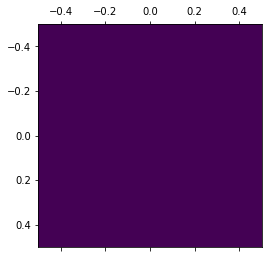

In [105]:
import matplotlib.pyplot as plt

plt.matshow(qf_1.cov())
plt.show()

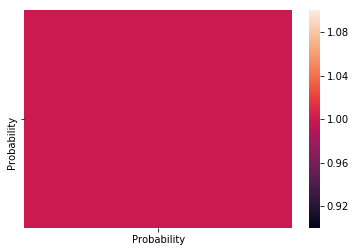

In [103]:
corr = qf_1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a187083c8>]],
      dtype=object)

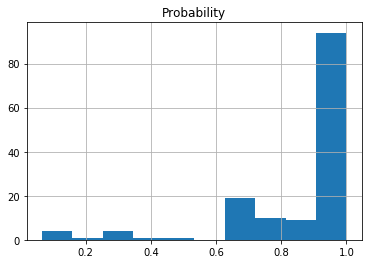

In [71]:
qf.hist()


In [49]:
prob = np.array(prob)

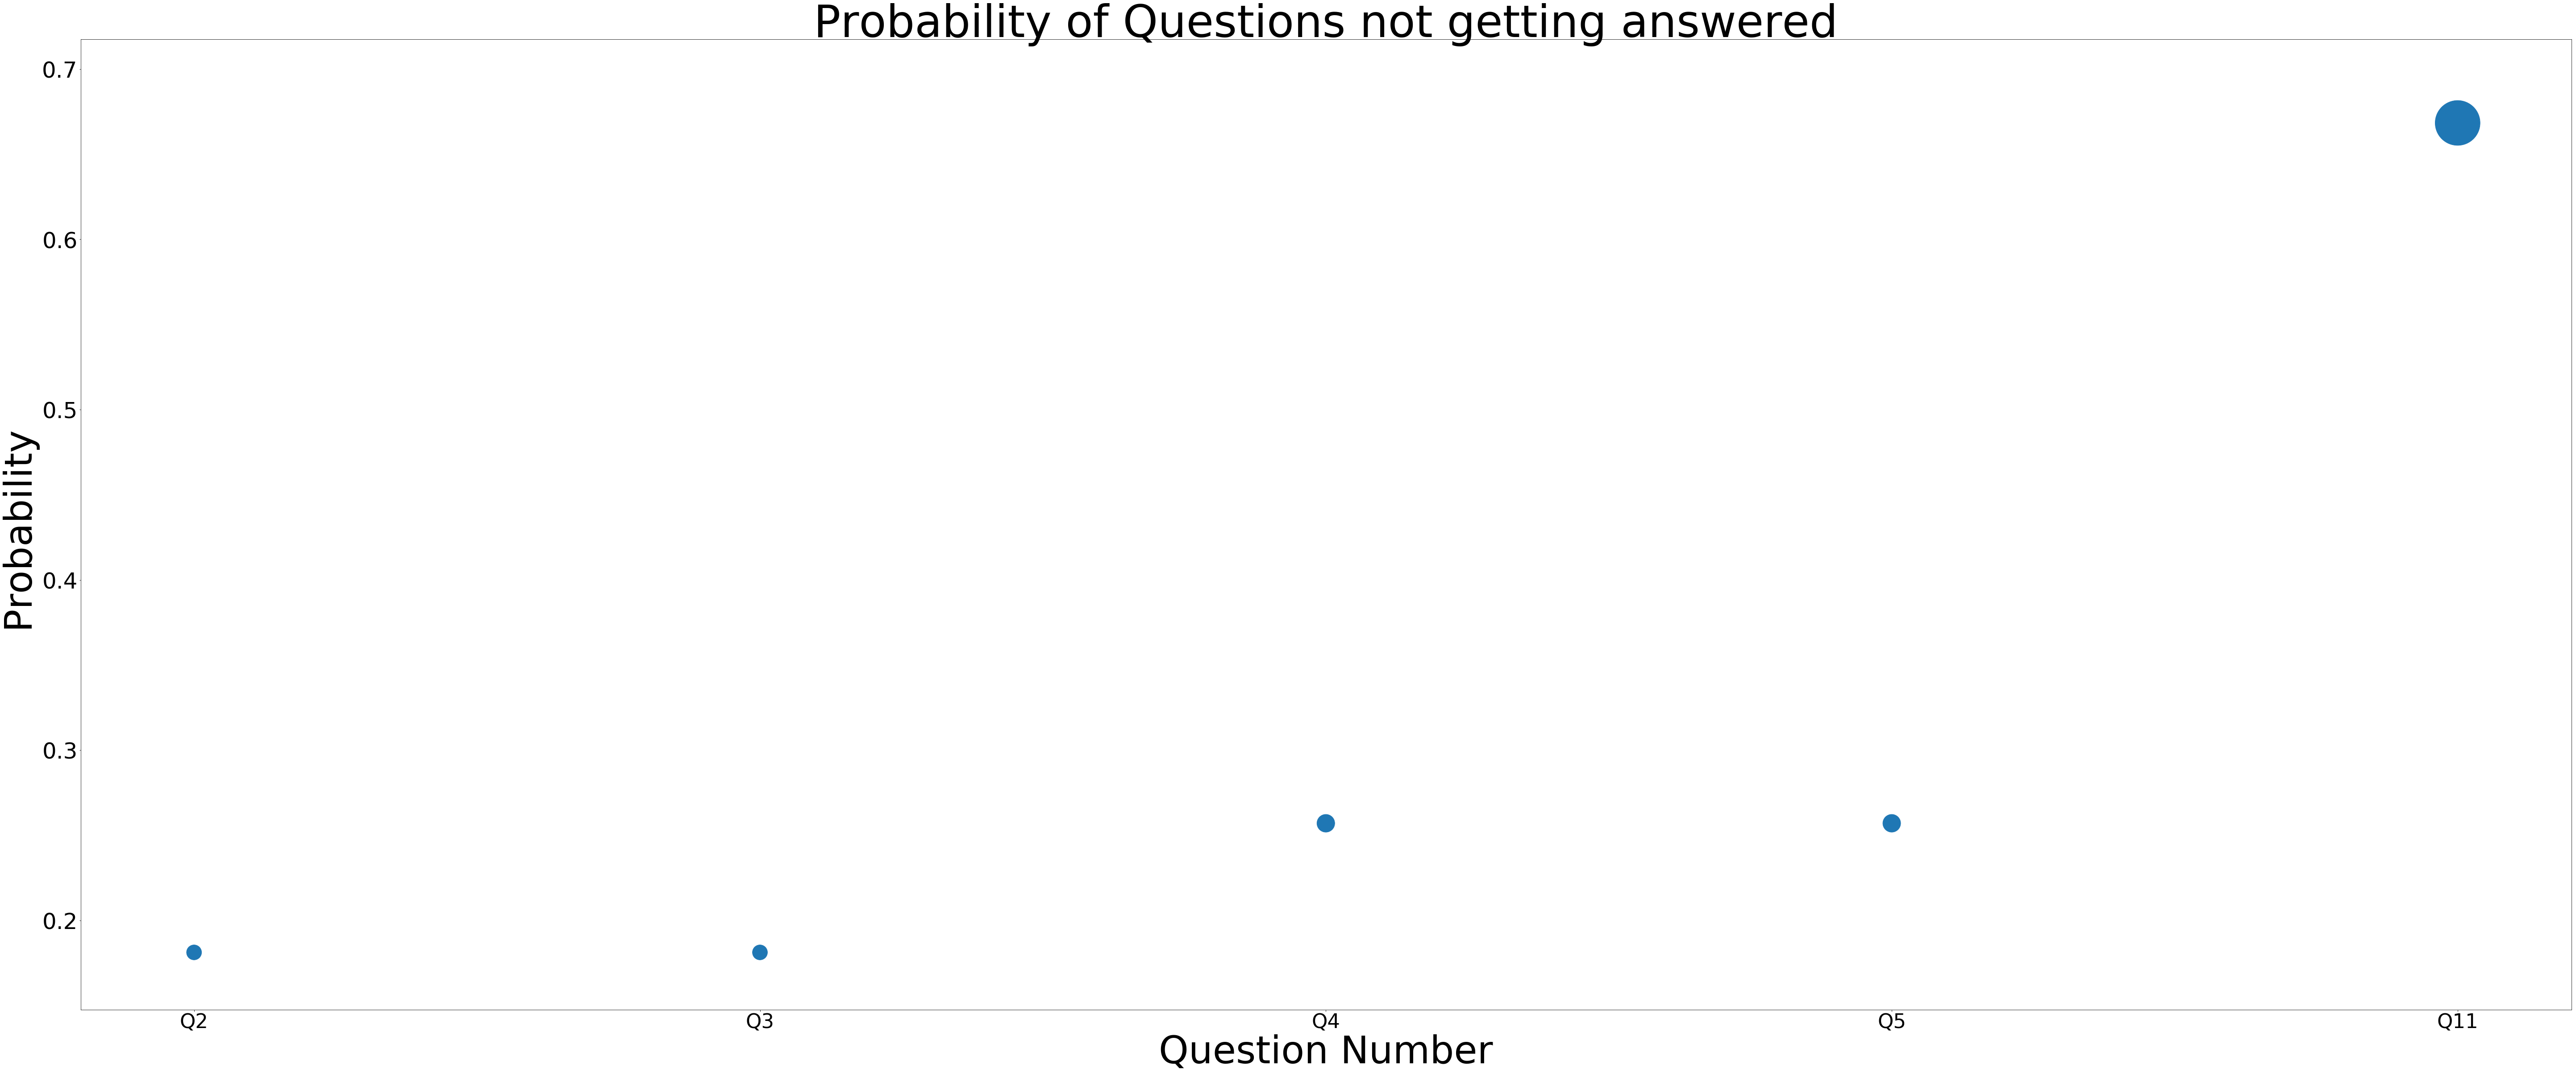

In [52]:
plt.figure(figsize=(100,40))
less_prob = prob[prob<0.7]
s = [500*90**n for n in less_prob]
plt.rc('axes', labelsize=85) 

import matplotlib 
matplotlib.rc('xtick', labelsize=45) 
matplotlib.rc('ytick', labelsize=50) 
plt.xlabel("Question Number")
plt.ylabel("Probability ")
plt.title("Probability of Questions not getting answered", size=100)
plt.scatter(columns[prob<0.7], less_prob, s=s )
plt.show()

In [53]:
df.to_csv(r'probability_progress_not_100.csv')

<Figure size 1440x1440 with 0 Axes>

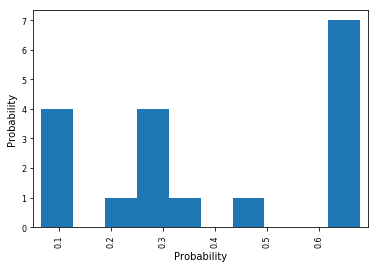

In [108]:
from pandas.plotting import scatter_matrix
plt.figure(figsize=(20,20))
less_prob = prob[prob<0.7]
s = [200*40**n for n in less_prob]
plt.rc('axes', labelsize=10) 
scatter_matrix(qf_1 )
plt.show()

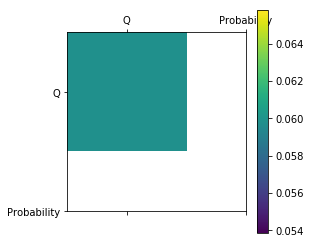

In [101]:
plt.matshow(qf_1.cov())
plt.xticks(range(len(qf_1.columns)), qf_1.columns)
plt.yticks(range(len(qf_1.columns)), qf_1.columns)
plt.colorbar()
plt.show()

In [97]:
qf_1 = qf[qf["Probability"] < 0.7]

In [6]:
num_df = time_df.select_dtypes(include=[np.number])
num_df = num_df.drop(['ID'], axis=1)
num_df.sample(3)

,Progress,Duration
15524,22,79
16875,100,264
20388,100,786


In [7]:
stats = describe_momentums(num_df)
stats

,Progress,Duration
count,25616.000000,2.561600e+04
min,0.000000,1.000000e+00
max,100.000000,7.696359e+06
median,100.000000,2.040000e+02
mean,72.730052,4.381541e+03
std,38.399267,1.045965e+05
skew,-0.838935,4.815231e+01
kurt,-1.080638,2.679066e+03


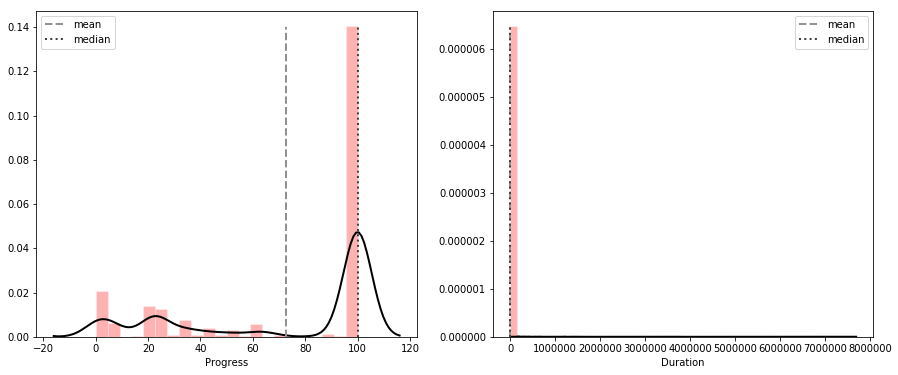

In [8]:
cols_labels = num_df.columns.values
rows = 1
cols = np.floor(len(cols_labels) / rows)
fig = plt.figure(figsize=(15, 6))
for i in range(len(cols_labels)):
    ax = fig.add_subplot(rows, cols, i + 1)
    column = cols_labels[i]
    ax = sns.distplot(num_df[column].dropna(), hist_kws={'color': 'r', 'ec': 'w', 'alpha': 0.3}, 
                      kde_kws={'color': 'k', 'lw': 2}, ax=ax)
    mean = ax.axvline(stats[column].loc['mean'], ymax=0.95, color='#919191', label='mean', ls='--', lw=2)
    median = ax.axvline(stats[column].loc['median'], ymax=0.95, color='#404040', label='median', ls=':', lw=2)
    plt.legend(handles=[mean, median])

In [9]:
cat_df = time_df.select_dtypes(include=[np.object])
cat_df.loc[:, 'Finished'] = df['Finished']
cat_df.sample(3)

/Users/bramshqamarchandio/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/bramshqamarchandio/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,StartDate,EndDate,RecordedDate,AccessDate,AccessTime,Finished
22097,11/22/18 21:37,11/22/18 21:42,11/22/18 21:42,11/22/18,21:37:30,True
20773,10/31/18 15:49,10/31/18 15:59,10/31/18 15:59,10/31/18,15:49:55,True
3937,1/3/18 20:44,1/3/18 20:45,1/4/18 20:45,1/3/18,20:44:32,False


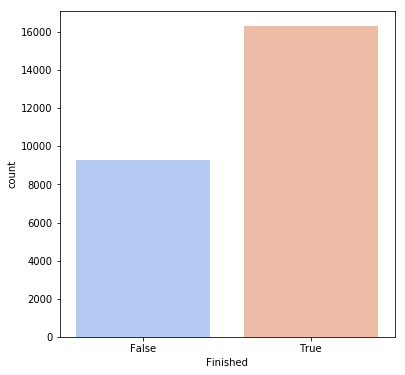

In [10]:
cols_labels = cat_df[['Finished']].columns.values
rows = 1
cols = np.ceil(len(cols_labels) / rows)
fig = plt.figure(figsize=(6, 6))
for i in range(len(cols_labels)):
    ax = fig.add_subplot(rows, cols, i + 1)
    column = cols_labels[i]
    ax = sns.countplot(cat_df[column], palette='coolwarm')

In [11]:


user_df = df[['ID', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'AccessZip', 'AccessCountry']]

user_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25616 entries, 0 to 25615
Data columns (total 6 columns):
ID                    25616 non-null int64
RecipientLastName     0 non-null float64
RecipientFirstName    0 non-null float64
RecipientEmail        0 non-null float64
AccessZip             22156 non-null object
AccessCountry         25604 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ MB


In [12]:


meta_df = df[['ID', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 
              'UserLanguage', 'source', 'type', 'program_id', 'user', 'InquiryType', 'Q_R_DEL', 'audience', 'date', 
              'level', 'program', 'subject', 'created', 'MobileDevice', 'MobileType', 'UGCampus', 'Grad_prog', 
              'Grad_contact', 'Administrative', 'CampusAssignment', 'Q52_2', 'Q56_5']]

meta_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25616 entries, 0 to 25615
Data columns (total 29 columns):
ID                     25616 non-null int64
ExternalReference      0 non-null float64
LocationLatitude       0 non-null float64
LocationLongitude      0 non-null float64
DistributionChannel    25616 non-null object
UserLanguage           24385 non-null object
source                 25400 non-null object
type                   25399 non-null object
program_id             11921 non-null float64
user                   53 non-null float64
InquiryType            23830 non-null object
Q_R_DEL                2136 non-null object
audience               1228 non-null object
date                   1115 non-null float64
level                  6111 non-null object
program                6111 non-null object
subject                1806 non-null object
created                0 non-null float64
MobileDevice           11231 non-null object
MobileType             2823 non-null object
UGCampus   

In [13]:
durarray = np.asarray(time_df['Duration'])
timearray = np.asarray(time_df['Progress'])
prog_array = np.vstack((timearray, durarray))

In [14]:
prog_array = prog_array.swapaxes(0, 1)

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(prog_array)
y_kmeans = kmeans.predict(prog_array)

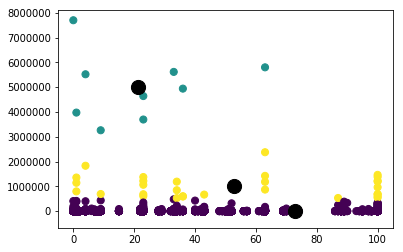

In [17]:
plt.scatter(prog_array[:, 0], prog_array[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='black')

time series

In [18]:

fd = df.set_index('StartDate')
fd.index

Index(['9/5/17 14:18', '9/5/17 14:23', '9/5/17 16:18', '9/5/17 16:58',
       '9/5/17 17:38', '9/5/17 18:05', '9/5/17 19:03', '9/5/17 19:56',
       '9/5/17 20:06', '9/5/17 20:57',
       ...
       '1/24/19 11:15', '1/24/19 11:22', '1/24/19 11:53', '1/23/19 12:00',
       '1/24/19 11:46', '1/24/19 11:58', '1/24/19 12:08', '1/23/19 12:07',
       '1/23/19 12:03', '1/24/19 11:59'],
      dtype='object', name='StartDate', length=25616)

In [24]:
df

,ID,StartDate,EndDate,Status,IPAddress,Progress,Duration,Finished,RecordedDate,ResponseId,...,created,MobileDevice,MobileType,UGCampus,Grad_prog,Grad_contact,Administrative,CampusAssignment,Q52_2,Q56_5
0,1,9/5/17 14:18,9/5/17 14:22,IP Address,NaN,100,228,True,9/5/17 14:22,R_3ltauVFat0RfAh1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IUEAA,NaN,NaN
1,2,9/5/17 14:23,9/5/17 14:27,IP Address,NaN,100,243,True,9/5/17 14:27,R_1kXlj2yafAcirej,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IUEAA,NaN,NaN
2,3,9/5/17 16:18,9/5/17 16:26,IP Address,NaN,100,449,True,9/5/17 16:26,R_3dWD17jZq25xAdh,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IUNWA,NaN,NaN
3,4,9/5/17 16:58,9/5/17 17:04,IP Address,NaN,100,372,True,9/5/17 17:04,R_3EAy6xxhByIqrlU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IUEAA,NaN,NaN
4,5,9/5/17 17:38,9/5/17 17:58,IP Address,NaN,100,1229,True,9/5/17 17:58,R_3Hqsdn86VgHLlA1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IUINA,NaN,NaN
5,6,9/5/17 18:05,9/5/17 18:11,IP Address,NaN,100,345,True,9/5/17 18:11,R_2Sq6SiWmkUsct8k,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IUKOA,NaN,NaN
6,7,9/5/17 19:03,9/5/17 19:05,IP Address,NaN,100,99,True,9/5/17 19:05,R_3F1AkKAWyTHw8g1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TBD,NaN,NaN
7,8,9/5/17 19:56,9/5/17 20:02,IP Address,NaN,100,325,True,9/5/17 20:02,R_2CfuPtoKoqMyFJ1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IUEAA,NaN,NaN
8,9,9/5/17 20:06,9/5/17 20:09,IP Address,NaN,100,175,True,9/5/17 20:09,R_wZe3LhcbfHZW7GF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IUINA,NaN,NaN
9,10,9/5/17 20:57,9/5/17 21:00,IP Address,NaN,100,175,True,9/5/17 21:00,R_2ttBPWCIv4RR8NQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IUEAA,NaN,NaN


In [31]:
#y = fd['Finished'].resample('MS').mean()

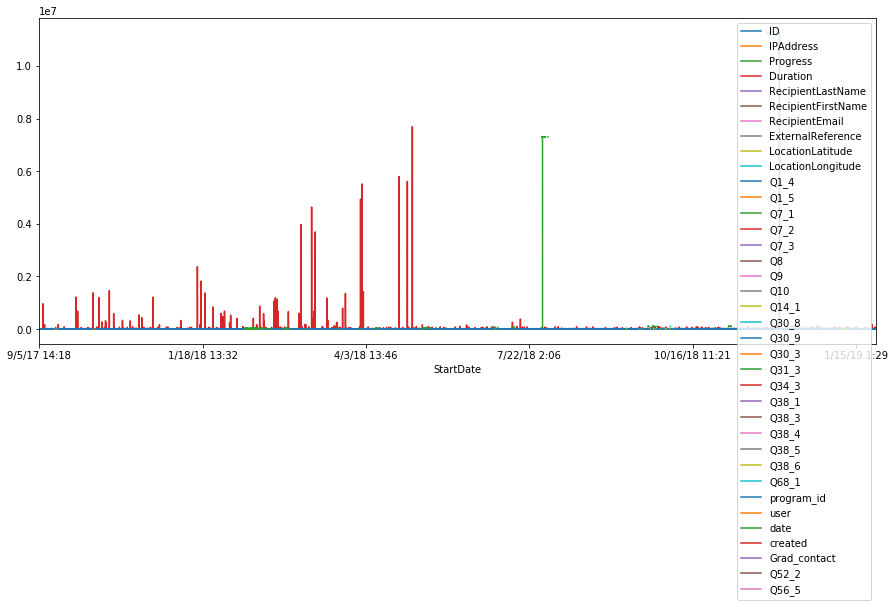

In [19]:
fd.plot(figsize=(15, 6))
plt.show()

In [ ]:
y = fd["Finished"]

In [20]:
y = fd["Duration"]

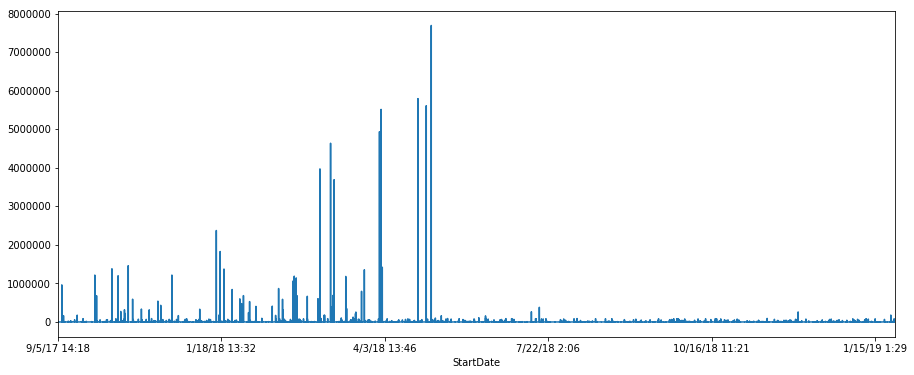

In [21]:
y.plot(figsize=(15, 6))
plt.show()

In [46]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(x, model='additive')
fig = decomposition.plot()
plt.show()

AttributeError: 'Index' object has no attribute 'inferred_freq'

In [68]:
ans = y.rolling(window=1000).mean()
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

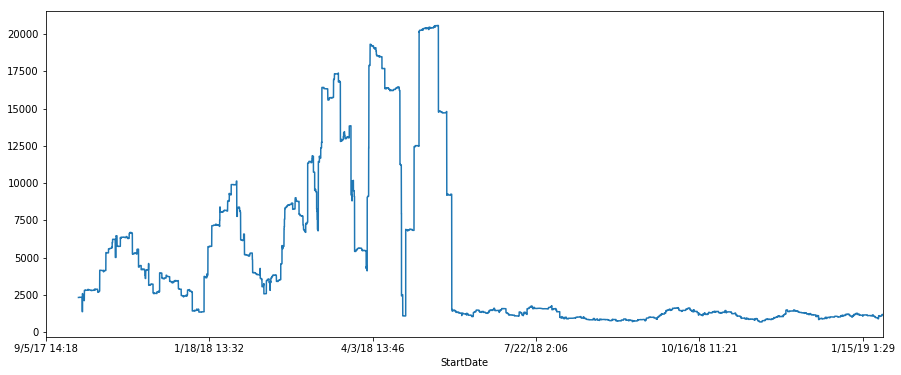

In [69]:
ans.plot(figsize=(15, 6))
plt.show()

In [61]:
t = fd["Finished"]

In [67]:
y.rolling(window=2)

Rolling [window=2,center=False,axis=0]

In [70]:
ans

StartDate
9/5/17 14:18         NaN
9/5/17 14:23       235.5
9/5/17 16:18       346.0
9/5/17 16:58       410.5
9/5/17 17:38       800.5
9/5/17 18:05       787.0
9/5/17 19:03       222.0
9/5/17 19:56       212.0
9/5/17 20:06       250.0
9/5/17 20:57       175.0
9/5/17 21:07       211.0
9/5/17 22:53       222.5
9/6/17 10:35       279.5
9/6/17 14:06       519.5
9/6/17 14:22       526.5
9/6/17 15:43       340.5
9/6/17 16:33       265.0
9/6/17 16:48       386.5
9/7/17 3:04        368.0
9/7/17 9:19        188.5
9/7/17 13:29       148.0
9/7/17 13:49       110.5
9/7/17 13:51        87.5
9/7/17 14:20       315.0
9/7/17 14:52       477.0
9/7/17 23:06       666.0
9/8/17 5:08        586.0
9/8/17 8:41        211.0
9/8/17 8:45        245.5
9/8/17 9:29        415.0
                  ...   
1/22/19 8:48     41735.0
1/23/19 7:40     41443.5
1/23/19 8:31       150.5
1/23/19 8:45      1007.0
1/24/19 9:10      1271.0
1/23/19 9:19       351.5
1/24/19 9:25       242.5
1/24/19 9:35       350.0
1/23/19 7:41   

In [72]:
ts = y.cumsum()

In [ ]:
tt = fd[""]

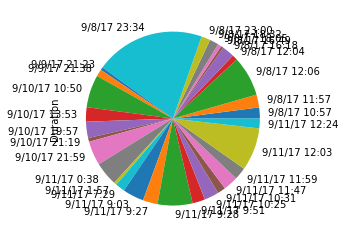

In [47]:
y[30:60].plot(kind="pie")

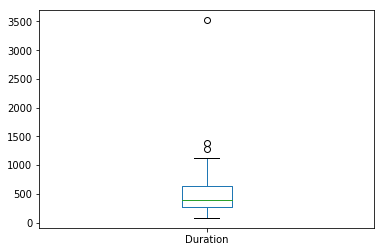

In [52]:
y[30:60].plot(kind="box")

In [50]:
ht = fd["Progress"]

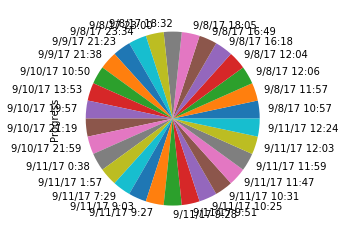

In [51]:
ht[30:60].plot(kind="pie")

In [44]:
len(ht)#[89]

25616

In [26]:
import seaborn as sns

In [ ]:
y.plot(kind="box")